In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier

In [21]:
df = pd.read_csv("video_data_top10_channels.csv")

In [22]:
pd.set_option("display.MAX_COLUMNS", None)

In [23]:
df.head()

,Unnamed: 0,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,0,1KEbiqRWOkA,Alex The Analyst,7 Mistakes to Avoid During Your Data Analyst J...,When I was a Hiring Managers I saw a lot of pe...,"['Data Analyst', 'Data Analyst job', 'Data Ana...",2024-03-05T13:00:01Z,8218,382.0,NaN,40.0,PT11M54S,hd,False
1,1,UOBTLzWY1vs,Alex The Analyst,#DataAnalyst #AnalystBuilder #SQL,Link: AnalystBuilder.com,NaN,2024-03-01T13:43:29Z,5703,401.0,NaN,13.0,PT38S,hd,False
2,2,8zOkBTs0yxs,Alex The Analyst,Q/A Livestream | February Livestream | Ask Me ...,This is February's Livestream where you can co...,"['Data Analyst', 'Data Analyst job', 'Data Ana...",2024-02-29T17:10:18Z,4536,181.0,NaN,6.0,PT1H34M57S,hd,False
3,3,7NBt0V8ebGk,Alex The Analyst,Window Functions in MySQL | Intermediate MySQL,Full MySQL Course: https://www.analystbuilder....,"['Data Analyst', 'Data Analyst job', 'Data Ana...",2024-02-27T13:00:08Z,5471,183.0,NaN,13.0,PT13M29S,hd,False
4,4,FGC0cCAgGu0,Alex The Analyst,Twitter making me tear up over here 🥹,NaN,NaN,2024-02-23T13:34:27Z,3988,213.0,NaN,11.0,PT16S,hd,False


In [4]:
mapping = {'hd': 1, 'sd': 0}
df['definition'] = df['definition'].replace(mapping)

In [5]:
# Convert categorical variables to numerical format
le = LabelEncoder()
df['title'] = le.fit_transform(df['title'])
df['tags'] = le.fit_transform(df['tags'])
df['description'] = le.fit_transform(df['description'])

In [6]:
df.head(5)

,Unnamed: 0,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,0,1KEbiqRWOkA,Alex The Analyst,111,3983,257,2024-03-05T13:00:01Z,8218,382.0,NaN,40.0,PT11M54S,1,False
1,1,UOBTLzWY1vs,Alex The Analyst,6,2319,3601,2024-03-01T13:43:29Z,5703,401.0,NaN,13.0,PT38S,1,False
2,2,8zOkBTs0yxs,Alex The Analyst,3401,3276,204,2024-02-29T17:10:18Z,4536,181.0,NaN,6.0,PT1H34M57S,1,False
3,3,7NBt0V8ebGk,Alex The Analyst,4774,670,257,2024-02-27T13:00:08Z,5471,183.0,NaN,13.0,PT13M29S,1,False
4,4,FGC0cCAgGu0,Alex The Analyst,4447,4330,3601,2024-02-23T13:34:27Z,3988,213.0,NaN,11.0,PT16S,1,False


In [7]:
count_likes_greater_than_10000 = df[df['likeCount'] > 10000]['likeCount'].count()

In [8]:
count_likes_greater_than_10000

200

In [9]:
threshold_likes = 1000
df['trending'] = (df['likeCount'] > threshold_likes).astype(int)

In [10]:
df.head(5)

,Unnamed: 0,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,trending
0,0,1KEbiqRWOkA,Alex The Analyst,111,3983,257,2024-03-05T13:00:01Z,8218,382.0,NaN,40.0,PT11M54S,1,False,0
1,1,UOBTLzWY1vs,Alex The Analyst,6,2319,3601,2024-03-01T13:43:29Z,5703,401.0,NaN,13.0,PT38S,1,False,0
2,2,8zOkBTs0yxs,Alex The Analyst,3401,3276,204,2024-02-29T17:10:18Z,4536,181.0,NaN,6.0,PT1H34M57S,1,False,0
3,3,7NBt0V8ebGk,Alex The Analyst,4774,670,257,2024-02-27T13:00:08Z,5471,183.0,NaN,13.0,PT13M29S,1,False,0
4,4,FGC0cCAgGu0,Alex The Analyst,4447,4330,3601,2024-02-23T13:34:27Z,3988,213.0,NaN,11.0,PT16S,1,False,0


In [11]:
df.isnull().sum()

Unnamed: 0           0
video_id             0
channelTitle         0
title                0
description          0
tags                 0
publishedAt          0
viewCount            0
likeCount            1
favouriteCount    4933
commentCount         2
duration             0
definition           0
caption              0
trending             0
dtype: int64

In [12]:
df["commentCount"].fillna(df["commentCount"].mean(), inplace=True)

In [13]:
#Train Test Split
# Select features for training the model
features = ['title', 'tags', 'viewCount', 'commentCount']
X = df[features]
y = df['trending']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
#Model Selection
# Build a Random Forest Classifier model - Ensemble Learning /Highly Accurate /Reduced Overfitting /Feature Importance /Feature Importance
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       644
           1       0.85      0.87      0.86       343

    accuracy                           0.90       987
   macro avg       0.89      0.89      0.89       987
weighted avg       0.90      0.90      0.90       987



In [15]:
import pickle

In [16]:
pickle.dump(model, open("model.pkl","wb"))

In [17]:
pickle.dump(le, open("labelEncoder.pkl","wb"))

<Axes: xlabel='viewCount', ylabel='commentCount'>

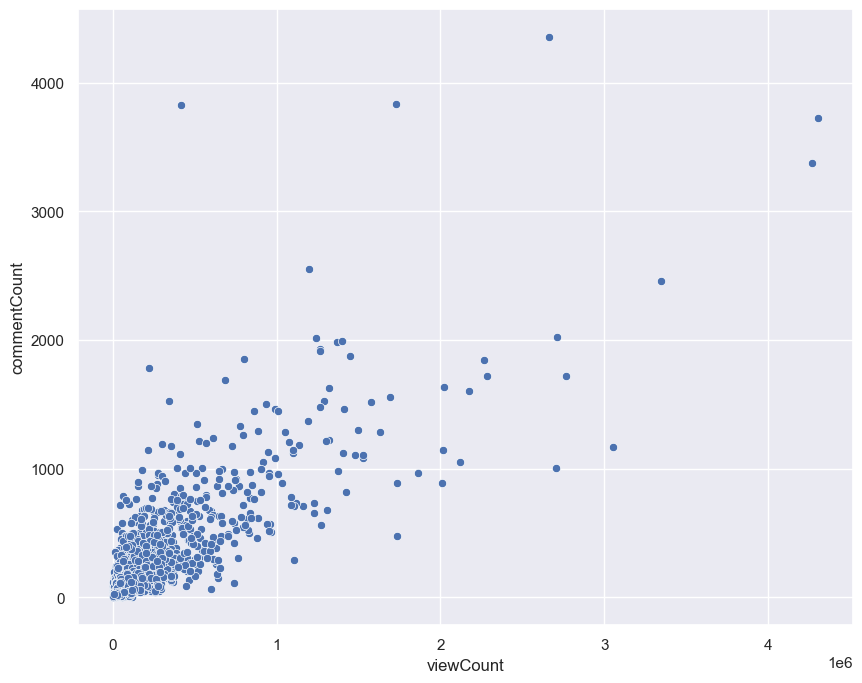

In [29]:
import seaborn as sns
sns.scatterplot(x=df["viewCount"], y = df["commentCount"])

In [30]:
clf = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=0)
clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=100, random_state=0)

In [31]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       644
           1       0.87      0.85      0.86       343

    accuracy                           0.90       987
   macro avg       0.89      0.89      0.89       987
weighted avg       0.90      0.90      0.90       987



In [32]:
pickle.dump(clf, open("clf.pkl","wb"))